In [1]:
import tensorflow as tf
import numpy as np
import time

# Load and preprocess the dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images / 255.0
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images / 255.0

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), trainable=False),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', trainable=False),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', trainable=False),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
start_time = time.time()
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))
end_time = time.time()

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('Test accuracy:', test_acc)
print('Time elapsed:', end_time - start_time)


/Users/gedena/miniconda3/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Metal device set to: Apple M2


2023-05-29 15:44:49.413178: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-29 15:44:49.413277: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/5


2023-05-29 15:44:50.173969: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-05-29 15:44:50.334256: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1864/1875 [============================>.] - ETA: 0s - loss: 0.5524 - accuracy: 0.8128

2023-05-29 15:44:59.106979: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 10s 5ms/step - loss: 0.5517 - accuracy: 0.8131 - val_loss: 0.4541 - val_accuracy: 0.8399
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4087 - accuracy: 0.8582 - val_loss: 0.4150 - val_accuracy: 0.8554
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3747 - accuracy: 0.8695 - val_loss: 0.3896 - val_accuracy: 0.8619
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3511 - accuracy: 0.8786 - val_loss: 0.3830 - val_accuracy: 0.8639
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3338 - accuracy: 0.8830 - val_loss: 0.3704 - val_accuracy: 0.8716
313/313 - 1s - loss: 0.3704 - accuracy: 0.8716 - 1s/epoch - 4ms/step
Test accuracy: 0.8716000318527222
Time elapsed: 49.845025062561035


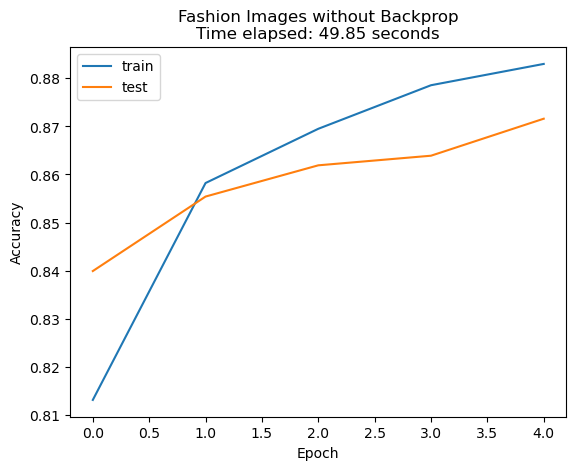

In [3]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Fashion Images without Backprop\nTime elapsed: {:.2f} seconds'.format(end_time - start_time))
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()